# Exploración inicial de la encuesta de inversores NFCS 2021

Este notebook realiza un **análisis exploratorio básico** del archivo de microdatos **NFCS 2021 Investor Survey**. Incluye carga de datos, evaluación de calidad, estadísticos descriptivos y visualización de las variables clave señaladas para el modelado de tolerancia al riesgo.

In [1]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use('default')
sns.set_theme(context='notebook', style='whitegrid')

# Ruta al CSV – AJUSTAR según su estructura
DATA_PATH = '/content/drive/MyDrive/Digitech/TFG/ML/Calculo-Riesgo'
nfcs_path = f"{DATA_PATH}/data/raw/nfcs/NFCS_2021_Investor_Data_221121.csv"

df = pd.read_csv(nfcs_path, low_memory=False)
print(f'Dimensiones: {df.shape}')

Mounted at /content/drive
Dimensiones: (2824, 106)


El dataset contiene **2824 encuestados** y **106 variables**. Esto indica una muestra amplia adecuada para modelar tolerancia al riesgo, con suficiente diversidad de variables sociodemográficas y financieras.

## Vista rápida de los datos

In [2]:
display(df.head())

,NFCSID,A1,A2,A3,B2_1,B2_2,B2_3,B2_4,B2_5,B2_7,...,G12,G13,G23,H31,WGT1,S_Gender2,S_Age,S_Ethnicity,S_Education,S_Income
0,2021010001,1,1,1,1,2,1,2,2,2,...,2,3,98,1,1.736049,2,1,1,2,3
1,2021010028,1,1,1,1,2,1,2,2,2,...,3,3,2,1,0.547490,2,3,1,2,1
2,2021010039,1,1,1,1,1,1,98,2,2,...,2,4,2,2,0.547490,1,3,1,2,2
3,2021010045,2,2,1,2,2,98,98,98,2,...,98,98,98,2,1.638773,1,2,2,1,1
4,2021010048,1,1,1,1,2,1,2,2,2,...,3,2,3,2,0.870537,1,3,1,1,1


Observamos columnas de identificación (**NFCSID**), variables demográficas (**S_Age, S_Gender2, S_Education, S_Income**), las preguntas clave de tolerancia al riesgo (**B10**), comportamiento (**B11, B4**) y conocimiento (**G1, G2**). La consistencia en los nombres facilita referenciar estas variables.

## Información de tipos de datos y valores ausentes

In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Columns: 106 entries, NFCSID to S_Income
dtypes: float64(1), int64(98), object(7)
memory usage: 3.2 MB


In [4]:
missing_pct = df.isna().mean().sort_values(ascending=False)
missing_pct[missing_pct > 0].head(20)

,0


Según el análisis, no hay valores ausentes en ninguna columna (0% de nulos), lo que confirma que todos los registros están completos y no es necesario imputar datos.

### Sustitución de códigos especiales 98/99 por NA

In [5]:
special_na = [98, 99]
df.replace(special_na, np.nan, inplace=True)

Los códigos 98 y 99 indican respuestas omitidas; convertirlos a NaN estandariza el tratamiento de missing antes de análisis y modelado.

## Estadísticos descriptivos

In [7]:
desc = df.describe(include='all', percentiles=[.25, .5, .75])
desc.T.head(30)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
NFCSID,2824.0,NaN,NaN,NaN,2021021663.25,7685.942567,2021010001.0,2021015314.75,2021020152.5,2021026992.75,2021037003.0
A1,2824.0,NaN,NaN,NaN,1.331445,0.470816,1.0,1.0,1.0,2.0,2.0
A2,2804.0,NaN,NaN,NaN,1.110556,0.313638,1.0,1.0,1.0,1.0,2.0
A3,2824.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
B2_1,2760.0,NaN,NaN,NaN,1.203623,0.402765,1.0,1.0,1.0,1.0,2.0
B2_2,2679.0,NaN,NaN,NaN,1.690556,0.462351,1.0,1.0,2.0,2.0,2.0
B2_3,2714.0,NaN,NaN,NaN,1.345615,0.475656,1.0,1.0,1.0,2.0,2.0
B2_4,2613.0,NaN,NaN,NaN,1.66284,0.472831,1.0,1.0,2.0,2.0,2.0
B2_5,2718.0,NaN,NaN,NaN,1.68028,0.466454,1.0,1.0,2.0,2.0,2.0
B2_7,2630.0,NaN,NaN,NaN,1.908365,0.288565,1.0,2.0,2.0,2.0,2.0


La variable **B11** (% en acciones) tiene mediana = 1, con cuartiles 1, 1 y 2 (en una escala de 1 a 3), indicando que la mayoría de inversores ubica su porcentaje de acciones en las categorías más bajas.

**B4** (valor total de inversiones) presenta mediana = 7, con Q1 = 5 y Q3 = 8 en una escala de 1 a 10, sugiriendo que el montante invertido se concentra en rangos medios-altos.

Los ordinales **B10, G1 y G2** muestran mediana = 3, con Q1 = 2 y Q3 = 3 o 4, evidenciando una tendencia centrada en tolerancia, comodidad y conocimiento moderados.

## Distribución de la tolerancia declarada al riesgo (B10)

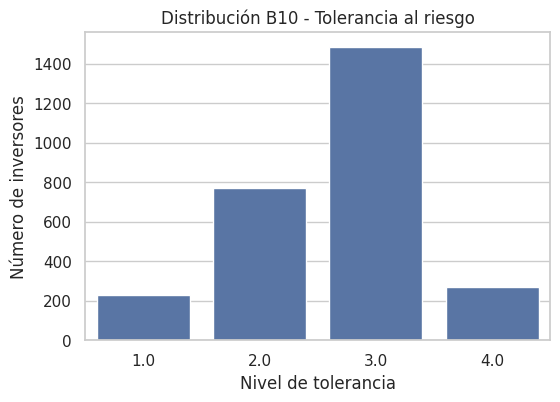

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='B10', data=df, order=sorted(df['B10'].dropna().unique()))
plt.title('Distribución B10 - Tolerancia al riesgo')
plt.xlabel('Nivel de tolerancia')
plt.ylabel('Número de inversores')
plt.show()

 La categoría más frecuente es nivel 3 (moderado), con disminución gradual hacia extremos (1 = alto riesgo y 4 = bajo riesgo), lo que sugiere que la mayoría prefiere un balance moderado al invertir.

## Porcentaje de portafolio en acciones (B11)

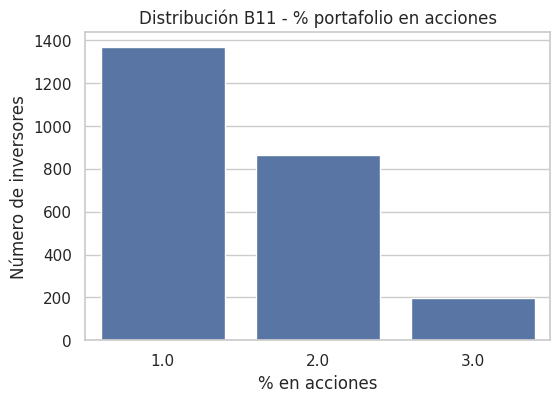

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='B11', data=df, order=sorted(df['B11'].dropna().unique()))
plt.title('Distribución B11 - % portafolio en acciones')
plt.xlabel('% en acciones')
plt.ylabel('Número de inversores')
plt.show()

El porcentaje de portafolio en acciones está concentrado en la categoría 1, seguida de la categoría 2 y por ultimo la 3, lo cual indica que la mayoría mantiene exposiciones bajas a moderadas en acciones.

## Valor total de inversiones (B4)

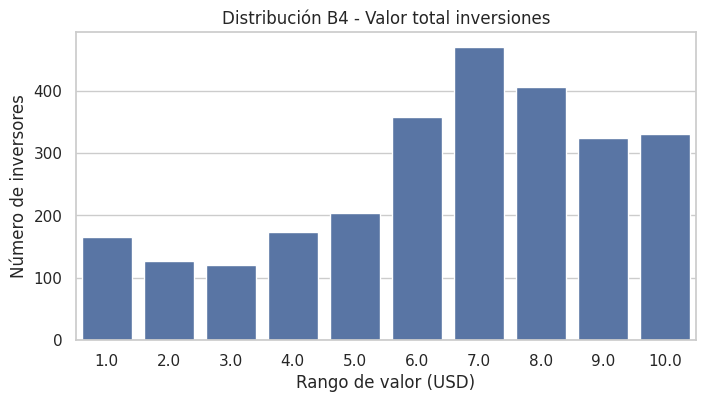

In [10]:
plt.figure(figsize=(8, 4))
sns.countplot(x='B4', data=df, order=sorted(df['B4'].dropna().unique()))
plt.title('Distribución B4 - Valor total inversiones')
plt.xlabel('Rango de valor (USD)')
plt.ylabel('Número de inversores')
plt.show()

La distribución muestra un pico en la categoría 7 (~470 inversores, ≈17%), que representa el rango medio-alto de inversión.

Las categorías adyacentes 6 y 8 también son muy frecuentes (~355 e ~405 inversores, ≈13% y ≈14%), lo que indica que la mayoría (≈44%) se concentra en rangos de 50k–250k USD.

En su conjunto, las categorías 6–10 (portafolios >50k) agrupan a cerca del 67% de los participantes, mostrando un perfil de inversores con patrimonios sustanciales.

En el extremo inferior, las categorías 1–3 (portafolios más pequeños) suman menos del 15% (~120–165 inversores cada una), lo que refleja una minoría de inversores con montos bajos.

La forma general es derechamente sesgada, con cola hacia rangos altos pero menor frecuencia en las categorías extremas 9–10.

## Confort y conocimiento inversor (G1, G2)

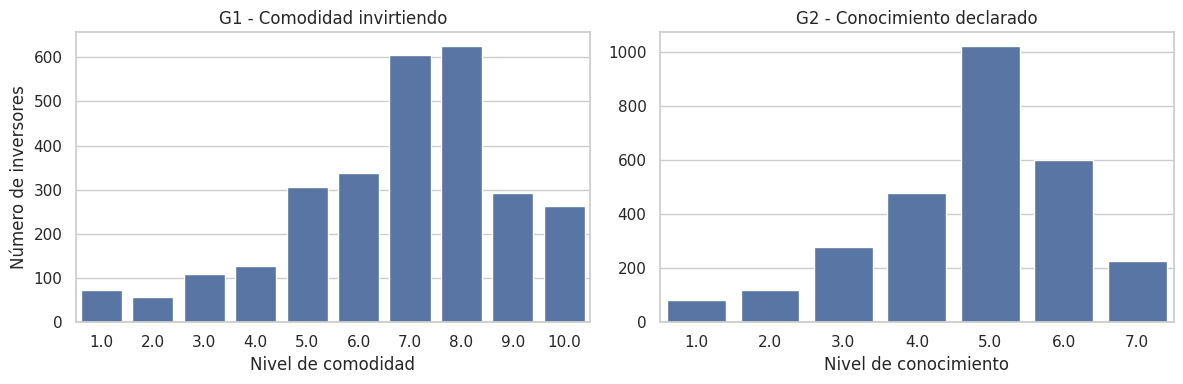

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(ax=axes[0], x='G1', data=df, order=sorted(df['G1'].dropna().unique()))
axes[0].set_title('G1 - Comodidad invirtiendo')
axes[0].set_xlabel('Nivel de comodidad')
axes[0].set_ylabel('Número de inversores')

sns.countplot(ax=axes[1], x='G2', data=df, order=sorted(df['G2'].dropna().unique()))
axes[1].set_title('G2 - Conocimiento declarado')
axes[1].set_xlabel('Nivel de conocimiento')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

Para **G1** (comodidad), los niveles 7 y 8 concentran la mayoría de respuestas, mostrando que muchos inversores se sienten bastante cómodos invirtiendo. En contraste, los extremos (niveles 1–3 y 9–10) representan. Para **G2** (conocimiento), el pico está en el nivel 5, seguido por nivel 6 y nivel 4, indicando un conocimiento medio con menor proporción en los extremos.

## Cruce rápido: Tolerancia al riesgo vs. % en acciones

B11  1.0  2.0  3.0
B10               
1.0  145   63   14
2.0  460  210   34
3.0  695  484   89
4.0   59  101   55


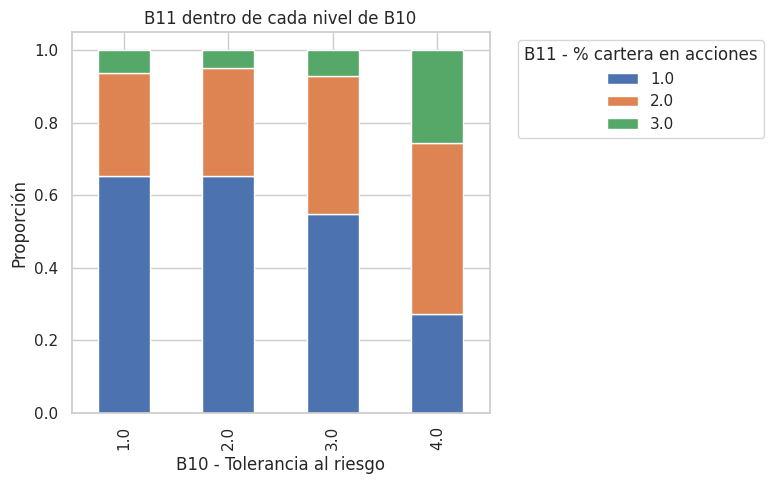

In [12]:
crosstab = pd.crosstab(df['B10'], df['B11'])
print(crosstab)

crosstab_norm = crosstab.div(crosstab.sum(axis=1), axis=0)

crosstab_norm.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('B11 dentro de cada nivel de B10')
plt.xlabel('B10 - Tolerancia al riesgo')
plt.ylabel('Proporción')
plt.legend(title='B11 - % cartera en acciones', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Se observa una relación positiva entre tolerancia declarada (B10) y exposición a acciones (B11): los inversores con mayor tolerancia (nivel 4) tienen ~26% en la categoría alta de acciones (B11=3), frente a solo ~6% de quienes declaran no tolerancia (nivel 1).

De forma inversa, la proporción de inversores sin acciones (B11=1) disminuye de ~65% en nivel 1 a ~27% en nivel 4.

Los niveles intermedios (2 y 3) muestran transiciones graduales, confirmando consistencia interna entre la tolerancia declarada y el comportamiento real.

##Conclusiones

La mayoría de los inversores (≈54%) prefiere una tolerancia moderada al riesgo (B10=3), reflejada en porcentajes bajos de exposición a acciones (≈56% con B11=1).

El valor total de inversiones se concentra en rangos medios-altos: ~67% de los participantes tiene portafolios >50 k USD, con pico en 75–100 k USD.

Los niveles de comodidad (G1) y conocimiento (G2) se ubican mayoritariamente en rangos intermedios (7–8 y 5–6), indicando inversores con confianza y literacy moderadas.

Existe coherencia interna: quienes declaran mayor tolerancia al riesgo asignan proporcionalmente más activos a acciones.

No se detectaron valores ausentes, por lo que el dataset está listo para análisis avanzados sin imputación.